In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import time
import copy
import os
warnings.filterwarnings("ignore")
#设置jupyter显示多行结果
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all' #默认为'last'
# #显示所有列
pd.set_option('display.max_columns', None) #原来中间会有部分列的显示被省略
# #显示所有行
# pd.set_option('display.max_rows', None)
#设置value的显示长度为100，默认为50
pd.set_option('max_colwidth',100)

# # 解决中文问题
# plt.rcParams['font.sans-serif'] = ['SimHei']
# 解决负号显示问题
plt.rcParams['axes.unicode_minus'] = False 

In [44]:
def draw_gan_loss(data_name, model_name):
    train_G_loss = np.loadtxt("./" + data_name + "/" + model_name + "/full_train_G_loss.txt")
    train_D_loss = np.loadtxt("./" + data_name + "/" + model_name + "/full_train_D_loss.txt")
    valid_G_loss = np.loadtxt("./" + data_name + "/" + model_name + "/full_valid_G_loss.txt")
    valid_D_loss = np.loadtxt("./" + data_name + "/" + model_name + "/full_valid_D_loss.txt")
    max_epoch = 50000
    x = np.arange(0,50000,500)
    x = np.append(x,49999)
    plt.figure(1,figsize=(9,6)) 
    
    plt.plot(x,
             train_G_loss[x],
             "r", linestyle="-", marker="None", linewidth=1, label = "train_G_loss")
    plt.plot(x,
             train_D_loss[x],
             "navy",linestyle="-", marker="None", linewidth=1, label = "train_D_loss")
    plt.plot(x,
             valid_G_loss[x],
             "orange",linestyle="-", marker="None", linewidth=1, label = "valid_G_loss")
    plt.plot(x,
             valid_D_loss[x],
             "green", linestyle="-", marker="None", linewidth=1, label = "valid_D_loss")

    # Add legend, title
    plt.rcParams.update({'font.size': 20})
    plt.legend()
    plt.title(model_name, fontsize=22)
    plt.xlabel('Epoch', fontsize=20)
    plt.ylabel('Loss', fontsize=20)
    plt.xticks(fontsize=20)
    plt.yticks(fontsize=20)

    plt.tight_layout()
    plt.savefig("../fig/" + data_name + "/" + model_name.lower() + "_loss.jpg", dpi=300, bbox_inches='tight')
    plt.show()

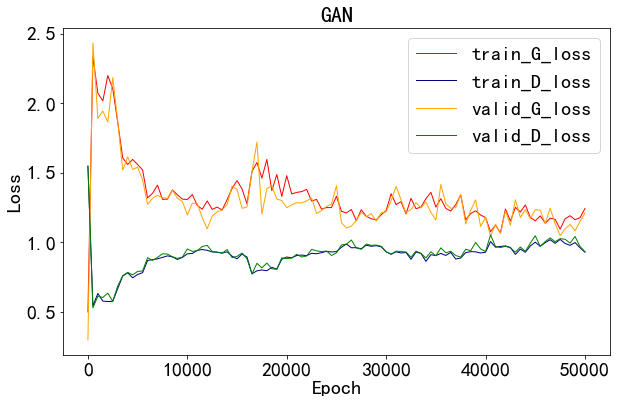

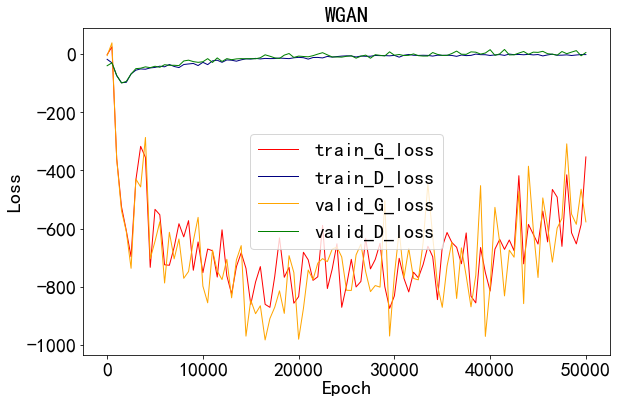

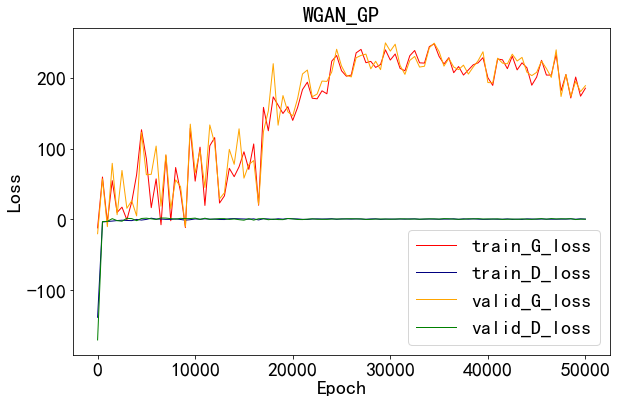

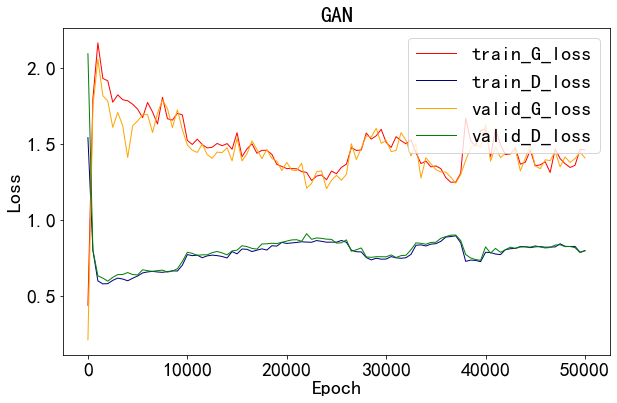

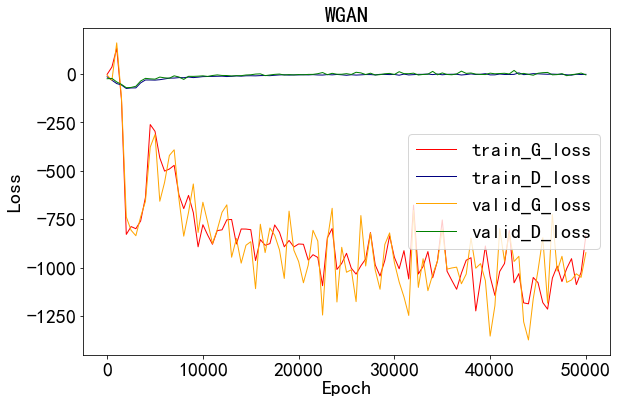

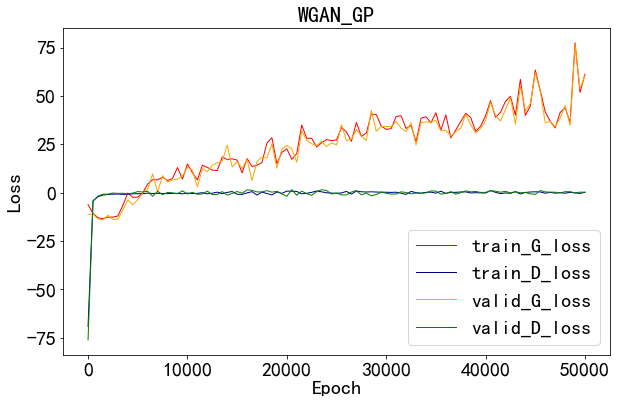

In [46]:
draw_gan_loss("circle_1","GAN")
draw_gan_loss("circle_1","WGAN")
draw_gan_loss("circle_1","WGAN_GP")
draw_gan_loss("circle_2","GAN")
draw_gan_loss("circle_2","WGAN")
draw_gan_loss("circle_2","WGAN_GP")

In [55]:
def draw_vae_loss(data_name, model_name):
    train_rec_loss = np.loadtxt("./" + data_name + "/" + model_name + "/full_train_rec_loss.txt")
    train_kl_loss = np.loadtxt("./" + data_name + "/" + model_name + "/full_train_kl_loss.txt")
    train_total_loss = np.loadtxt("./" + data_name + "/" + model_name + "/full_train_loss.txt")
    valid_rec_loss = np.loadtxt("./" + data_name + "/" + model_name + "/full_valid_rec_loss.txt")
    valid_kl_loss = np.loadtxt("./" + data_name + "/" + model_name + "/full_valid_kl_loss.txt")
    valid_total_loss = np.loadtxt("./" + data_name + "/" + model_name + "/full_valid_loss.txt")
    max_epoch = 50000
    x = np.arange(0,50000,500)
    x = np.append(x,49999)
    plt.figure(1,figsize=(9,6)) 
    
    plt.plot(x,
             train_rec_loss[x],
             "r", linestyle="-", marker="None", linewidth=1, label = "train reconstruction loss")
    plt.plot(x,
             train_kl_loss[x],
             "navy",linestyle="-", marker="None", linewidth=1, label = "train KL loss")
    plt.plot(x,
             train_total_loss[x],
             "m", linestyle="-", marker="None", linewidth=1, label = "train total loss")
    plt.plot(x,
             valid_rec_loss[x],
             "orange",linestyle="-", marker="None", linewidth=1, label = "valid reconstruction loss")
    plt.plot(x,
             valid_kl_loss[x],
             "green", linestyle="-", marker="None", linewidth=1, label = "valid KL loss")
    plt.plot(x,
             valid_total_loss[x],
             "gold", linestyle="-", marker="None", linewidth=1, label = "valid total loss")

    # Add legend, title
    plt.rcParams.update({'font.size': 20})
    plt.legend()
    plt.title(model_name, fontsize=22)
    plt.xlabel('Epoch', fontsize=20)
    plt.ylabel('Loss', fontsize=20)
    plt.xticks(fontsize=20)
    plt.yticks(fontsize=20)

    plt.tight_layout()
    plt.savefig("../fig/" + data_name + "/" + model_name.lower() + "_loss.jpg", dpi=300, bbox_inches='tight')
    plt.show()

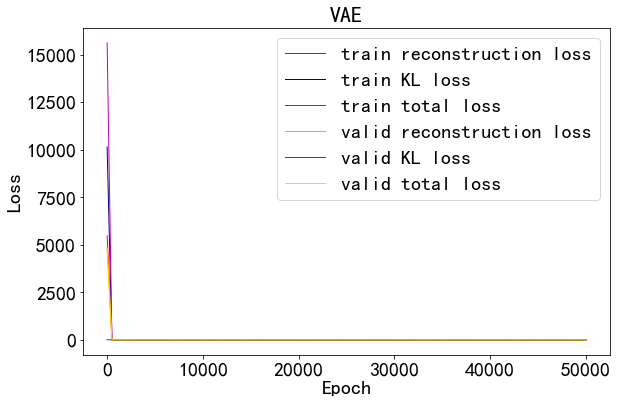

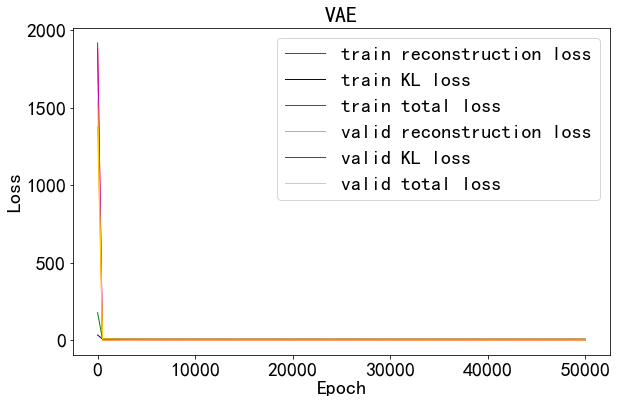

In [56]:
draw_vae_loss("circle_1","VAE")
draw_vae_loss("circle_2","VAE")